In [3]:
%%capture

#from siphon.catalog import TDSCatalog 
import numpy as np
import xarray as xr
import pandas as pd
import scipy
import gdal
from scipy.ndimage.filters import uniform_filter
from scipy import ndimage
from scipy.ndimage.filters import *
import os
import math
from osgeo import osr
from fractions import Fraction
import timeit
import matplotlib.pyplot as plt
#import matplotlib.image as mpimg
%matplotlib inline
import random
# import plotting tools
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib as mpl


In [6]:
location = (r'C:/PhD/junk')
os.chdir(location)
tc_2008 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2008.nc'
tc_2009 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2009.nc'
tc_2010 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2010.nc'
tc_2011 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2011.nc'
tc_2012 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2012.nc'
tc_2013 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2013.nc'
tc_2014 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2014.nc'
tc_2015 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2015.nc'
tc_2016 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2016.nc'
tc_2017 = 'C:/PhD/junk/ANUWALD.TreeCover.25m.2017.nc'
#url = 'http://dapds00.nci.org.au/thredds/dodsC/ub8/au/treecover/250m/ANUWALD.TreeCover.2014.250m.nc'

data08 = xr.open_dataset(tc_2008)
data09 = xr.open_dataset(tc_2009)
data10 = xr.open_dataset(tc_2010)
data11 = xr.open_dataset(tc_2011)
data12 = xr.open_dataset(tc_2012)
data13 = xr.open_dataset(tc_2013)
data14 = xr.open_dataset(tc_2014)
data15 = xr.open_dataset(tc_2015)
data16 = xr.open_dataset(tc_2016)
data17 = xr.open_dataset(tc_2017)
data17

<xarray.Dataset>
Dimensions:    (latitude: 139000, longitude: 162920, time: 1)
Coordinates:
  * time       (time) datetime64[ns] 2017-12-31
  * latitude   (latitude) float32 -8.999875 -9.000125 ... -43.749374 -43.749626
  * longitude  (longitude) float32 112.909874 112.910126 ... 153.63937 153.63962
Data variables:
    TreeCover  (time, longitude, latitude) float32 ...

In [7]:
list(data17.variables.keys())

['TreeCover', 'time', 'latitude', 'longitude']

In [24]:
data08.TreeCover

<xarray.DataArray 'TreeCover' (time: 1, longitude: 162920, latitude: 139000)>
[1171043520 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 2008-12-31
  * latitude   (latitude) float32 -8.999875 -9.000125 ... -43.749374 -43.749626
  * longitude  (longitude) float32 112.909874 112.910126 ... 153.63937 153.63962

In [41]:
trees08 = data08.TreeCover.sel(time = '2008-12-31')
fitzroy08 = trees08.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site08 = fitzroy08.transpose('latitude', 'longitude')
study_site_n08 = np.nan_to_num(np.array(study_site08))

In [42]:
trees09 = data09.TreeCover.sel(time = '2009-12-31')
fitzroy09 = trees09.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site09 = fitzroy09.transpose('latitude', 'longitude')
study_site_n09 = np.nan_to_num(np.array(study_site09))

In [43]:
trees10 = data10.TreeCover.sel(time = '2010-12-31')
fitzroy10 = trees10.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site10 = fitzroy10.transpose('latitude', 'longitude')
study_site_n10 = np.nan_to_num(np.array(study_site10))

In [44]:
trees11 = data11.TreeCover.sel(time = '2011-12-31')
fitzroy11 = trees11.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site11 = fitzroy11.transpose('latitude', 'longitude')
study_site_n11 = np.nan_to_num(np.array(study_site11))

In [45]:
trees12 = data12.TreeCover.sel(time = '2012-12-31')
fitzroy12 = trees12.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site12 = fitzroy12.transpose('latitude', 'longitude')
study_site_n12 = np.nan_to_num(np.array(study_site12))

In [46]:
trees13 = data13.TreeCover.sel(time = '2013-12-31')
fitzroy13 = trees13.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site13 = fitzroy13.transpose('latitude', 'longitude')
study_site_n13 = np.nan_to_num(np.array(study_site13))

In [47]:
trees14 = data14.TreeCover.sel(time = '2014-12-31')
fitzroy14 = trees14.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site14 = fitzroy14.transpose('latitude', 'longitude')
study_site_n14 = np.nan_to_num(np.array(study_site14))

In [48]:
trees15 = data15.TreeCover.sel(time = '2015-12-31')
fitzroy15 = trees15.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site15 = fitzroy15.transpose('latitude', 'longitude')
study_site_n15 = np.nan_to_num(np.array(study_site15))

In [49]:
trees16 = data16.TreeCover.sel(time = '2016-12-31')
fitzroy16 = trees16.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site16 = fitzroy16.transpose('latitude', 'longitude')
study_site_n16 = np.nan_to_num(np.array(study_site16))

In [50]:
trees17 = data17.TreeCover.sel(time = '2017-12-31')
fitzroy17 = trees17.sel(latitude=slice(-23.27, -23.63), longitude=slice(149.80, 150.35))
study_site17 = fitzroy17.transpose('latitude', 'longitude')
study_site_n17 = np.nan_to_num(np.array(study_site17))

In [58]:
trees08.latitude

<xarray.DataArray 'latitude' (latitude: 139000)>
array([ -8.999875,  -9.000125,  -9.000375, ..., -43.749126, -43.749374,
       -43.749626], dtype=float32)
Coordinates:
    time      datetime64[ns] 2008-12-31
  * latitude  (latitude) float32 -8.999875 -9.000125 ... -43.749374 -43.749626
Attributes:
    long_name:  latitude
    units:      degrees_north

In [52]:
tree_cover_mean = (study_site_n08 + study_site_n09 + study_site_n10 + study_site_n11 + study_site_n12
                    + study_site_n13 + study_site_n14 + study_site_n15 + study_site_n16 + study_site_n17)/10

In [68]:
treecover_percent = (tree_cover_mean * 100).astype(int)

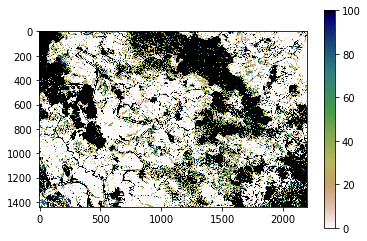

In [73]:
plt.imshow(treecover_percent, cmap="gist_earth_r")
plt.colorbar()

In [74]:
def array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):

    cols = array.shape[1]
    rows = array.shape[0]
    originX = rasterOrigin[0]
    originY = rasterOrigin[1]

    driver = gdal.GetDriverByName('GTiff')
    outRaster = driver.Create(newRasterfn, cols, rows, 1, gdal.GDT_Byte)
    outRaster.SetGeoTransform((originX, pixelWidth, 0, originY, 0, pixelHeight))
    outband = outRaster.GetRasterBand(1)
    outband.WriteArray(array)
    outRasterSRS = osr.SpatialReference()
    outRasterSRS.ImportFromEPSG(4326)
    outRaster.SetProjection(outRasterSRS.ExportToWkt())
    outband.FlushCache()

def main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array):
    reversed_arr = array[::-1] # reverse array so the tif looks like the array
    array2raster(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,reversed_arr) # convert array to raster


if __name__ == "__main__":
    rasterOrigin = (149.80,-23.63)
    pixelWidth = 0.00025
    pixelHeight = 0.00025
    newRasterfn = 'fitzroy_treecover_mean_25m.tif'
    array = treecover_percent
    main(newRasterfn,rasterOrigin,pixelWidth,pixelHeight,array)